In [ ]:
# !pip uninstall pyecharts
# !pip install pyecharts==0.5.11 -i https://pypi.tuna.tsinghua.edu.cn/simple/
# !pip uninstall scipy
# !pip install scipy==1.8 -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [1]:
# Load Pkgs
import pandas as pd
import networkx as nx
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyecharts import Graph
from collections import defaultdict
import secrets

# <span id="infor">网络图的基本信息</span>

In [2]:
df = pd.read_csv("data/ga_edgelist.csv")
df.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [5]:
# Read Our Edgelist
ga_graph = nx.from_pandas_edgelist(df,source="from",target="to")

# Info
print("nx.info:",nx.info(ga_graph))

# Check All Nodes/Object/People
print("nodes:" ,ga_graph.nodes())

print("len(ga_graph.nodes):",len(ga_graph.nodes()))

print("len(ga_graph.edges):",len(ga_graph.edges()))

AttributeError: module 'networkx' has no attribute 'info'

# <span id="plot">Problem1 网络图的基本可视化</span>

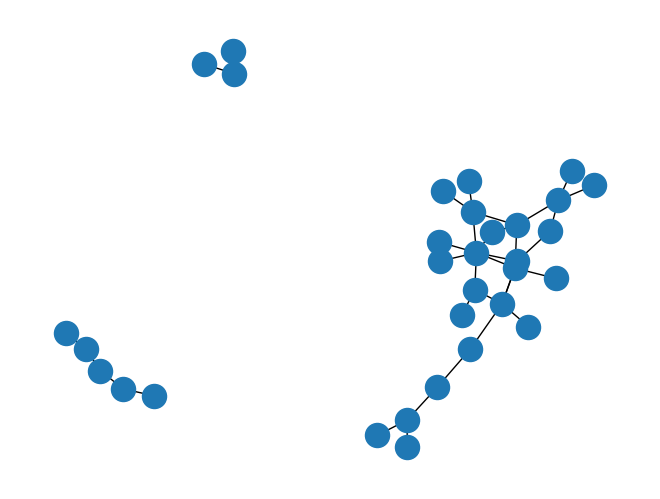

In [6]:
nx.draw(ga_graph)

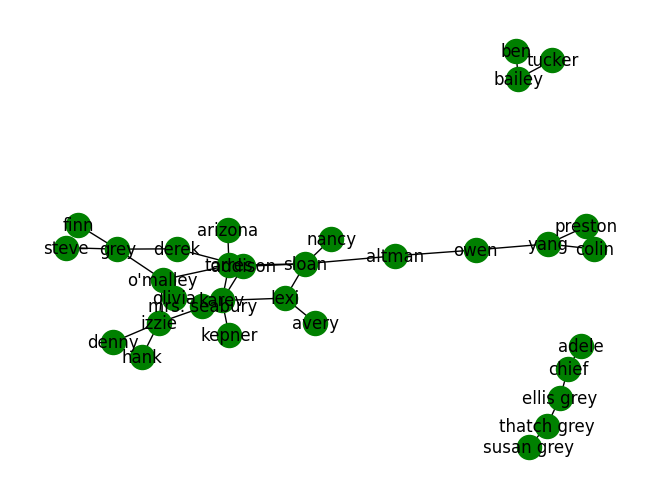

In [7]:
#显示标签，设置网络图不同颜色
nx.draw(ga_graph,with_labels=True,node_color='g')

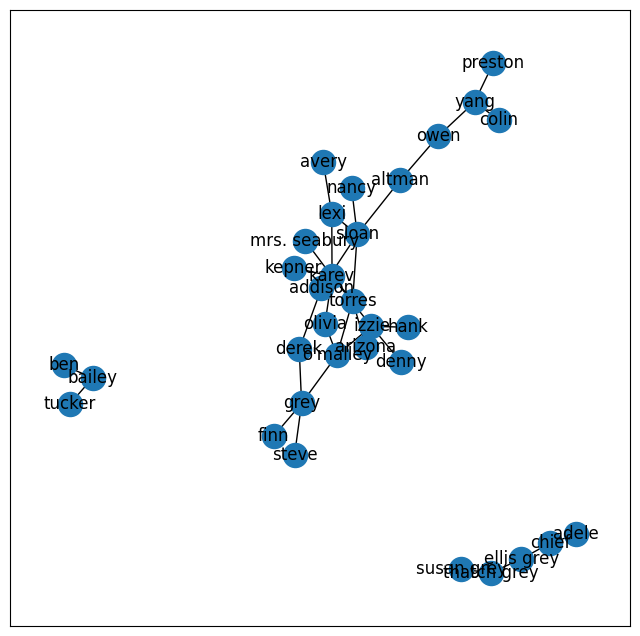

In [8]:
# method 2
plt.figure(figsize=(8,8))
nx.draw_networkx(ga_graph)
plt.show()

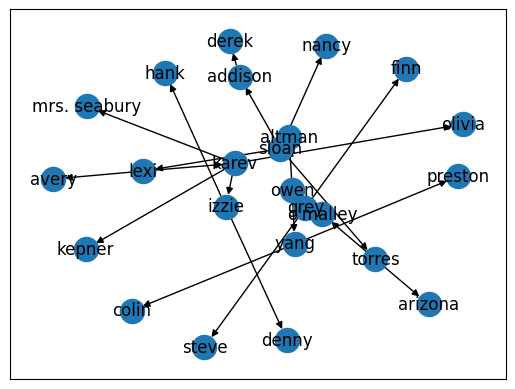

In [10]:
#构建子图
group1 = nx.bfs_tree(ga_graph,"owen")
nx.draw_networkx(group1)

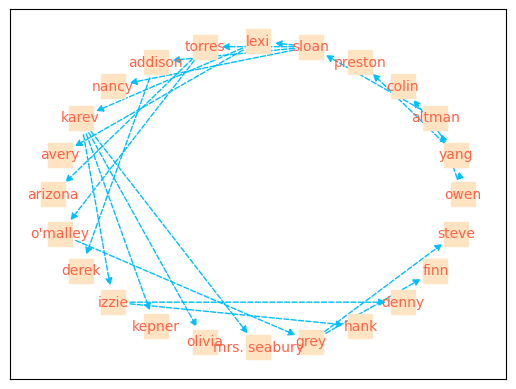

In [11]:
#节点布局调整
nx.draw_networkx(group1, pos=nx.circular_layout(group1),node_color='bisque',node_shape='s',style='--',
                 edge_color='deepskyblue',font_size=10,font_color='tomato')

### <span id="py">使用pyecharts可视化网络拓扑图</span>

In [13]:
from pyecharts import Graph

nodes=list(ga_graph.nodes())
edges=list(ga_graph.edges())

nodes=[{"name": n, "symbolSize": 20} for n in nodes]
links=[{"source": e[0], "target": e[1]} for e in edges]

# 边的两个节点之间的距离，这个距离也会受 repulsion。
graph = Graph("社交网络拓扑图",height=400,width=400)
graph.add("", nodes, links, repulsion=8000,is_label_show=True)
#graph.render('社交网络拓扑图.html')

# problem2 度及其分析

In [20]:
print("len(ga_graph.nodes):",len(ga_graph.nodes()))
print("len(ga_graph.edges):",len(ga_graph.edges()))

len(ga_graph.nodes): 32
len(ga_graph.edges): 34


In [41]:
ga_graph.nodes

NodeView(('lexi', 'sloan', 'karev', 'owen', 'yang', 'altman', 'torres', 'arizona', 'derek', 'grey', 'izzie', "o'malley", 'colin', 'preston', 'kepner', 'addison', 'nancy', 'olivia', 'mrs. seabury', 'chief', 'adele', 'ellis grey', 'thatch grey', 'susan grey', 'bailey', 'tucker', 'hank', 'denny', 'finn', 'steve', 'ben', 'avery'))

In [42]:
#degree
nx.degree(ga_graph)

# Degree of Connection 
# nx.degree(ga_graph,'lexi')

DegreeView({'lexi': 3, 'sloan': 5, 'karev': 7, 'owen': 2, 'yang': 3, 'altman': 2, 'torres': 4, 'arizona': 1, 'derek': 2, 'grey': 4, 'izzie': 4, "o'malley": 4, 'colin': 1, 'preston': 1, 'kepner': 1, 'addison': 3, 'nancy': 1, 'olivia': 2, 'mrs. seabury': 1, 'chief': 2, 'adele': 1, 'ellis grey': 2, 'thatch grey': 2, 'susan grey': 1, 'bailey': 2, 'tucker': 1, 'hank': 1, 'denny': 1, 'finn': 1, 'steve': 1, 'ben': 1, 'avery': 1})

In [46]:
degree_centrality = nx.degree_centrality(graph)
degree_centrality

{'lexi': 0.0967741935483871,
 'sloan': 0.16129032258064516,
 'karev': 0.22580645161290322,
 'owen': 0.06451612903225806,
 'yang': 0.0967741935483871,
 'altman': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'arizona': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'grey': 0.12903225806451613,
 'izzie': 0.12903225806451613,
 "o'malley": 0.12903225806451613,
 'colin': 0.03225806451612903,
 'preston': 0.03225806451612903,
 'kepner': 0.03225806451612903,
 'addison': 0.0967741935483871,
 'nancy': 0.03225806451612903,
 'olivia': 0.06451612903225806,
 'mrs. seabury': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'adele': 0.03225806451612903,
 'ellis grey': 0.06451612903225806,
 'thatch grey': 0.06451612903225806,
 'susan grey': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'tucker': 0.03225806451612903,
 'hank': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'finn': 0.03225806451612903,
 'steve': 0.03225806451612903,
 'ben': 0.03225806451612903,
 'avery': 0.

In [47]:
degree_eigenvector_centrality = nx.eigenvector_centrality(graph)
degree_eigenvector_centrality

{'lexi': 0.2642468018093454,
 'sloan': 0.3226885189834078,
 'karev': 0.502765929935718,
 'owen': 0.0340951785615966,
 'yang': 0.012046878049189778,
 'altman': 0.10443160377884475,
 'torres': 0.36092666447039123,
 'arizona': 0.10564217608811324,
 'derek': 0.12570927644873783,
 'grey': 0.15107970429307171,
 'izzie': 0.2842593314893894,
 "o'malley": 0.30201004505643037,
 'colin': 0.003527336042528878,
 'preston': 0.003527336042528878,
 'kepner': 0.14715740970512992,
 'addison': 0.2784034899141397,
 'nancy': 0.09445089593868508,
 'olivia': 0.235554604339933,
 'mrs. seabury': 0.14715740970512992,
 'chief': 1.0663186023876088e-06,
 'adele': 6.156393321318697e-07,
 'ellis grey': 1.2312786642593052e-06,
 'thatch grey': 1.0663186023876088e-06,
 'susan grey': 6.156393321318697e-07,
 'bailey': 4.7944137268011974e-08,
 'tucker': 3.390162458034994e-08,
 'hank': 0.0832011015170876,
 'denny': 0.0832011015170876,
 'finn': 0.04422106545855165,
 'steve': 0.04422106545855165,
 'ben': 3.390162458034994e-0

In [48]:
degree_betweenness_centrality = nx.betweenness_centrality(graph)
degree_betweenness_centrality

{'lexi': 0.07741935483870968,
 'sloan': 0.248100358422939,
 'karev': 0.2048745519713262,
 'owen': 0.12903225806451613,
 'yang': 0.09247311827956989,
 'altman': 0.16344086021505377,
 'torres': 0.14440860215053763,
 'arizona': 0.0,
 'derek': 0.038602150537634404,
 'grey': 0.10078853046594982,
 'izzie': 0.10311827956989246,
 "o'malley": 0.11702508960573477,
 'colin': 0.0,
 'preston': 0.0,
 'kepner': 0.0,
 'addison': 0.09480286738351255,
 'nancy': 0.0,
 'olivia': 0.01064516129032258,
 'mrs. seabury': 0.0,
 'chief': 0.0064516129032258064,
 'adele': 0.0,
 'ellis grey': 0.008602150537634409,
 'thatch grey': 0.0064516129032258064,
 'susan grey': 0.0,
 'bailey': 0.002150537634408602,
 'tucker': 0.0,
 'hank': 0.0,
 'denny': 0.0,
 'finn': 0.0,
 'steve': 0.0,
 'ben': 0.0,
 'avery': 0.0}

In [49]:
degree_pagerank = nx.pagerank(graph)
degree_pagerank

{'lexi': 0.038085993329253554,
 'sloan': 0.06040399162797684,
 'karev': 0.08213480005894228,
 'owen': 0.03059687647731207,
 'yang': 0.0495040651389162,
 'altman': 0.02795939896435635,
 'torres': 0.04759865829905491,
 'arizona': 0.014802421023514657,
 'derek': 0.026168573866133308,
 'grey': 0.0530178672434516,
 'izzie': 0.05122039824867587,
 "o'malley": 0.04747170469667207,
 'colin': 0.01871390418781742,
 'preston': 0.01871390418781742,
 'kepner': 0.01466080639168964,
 'addison': 0.036050712404583976,
 'nancy': 0.014955966427603773,
 'olivia': 0.024748340154822072,
 'mrs. seabury': 0.01466080639168964,
 'chief': 0.03842825324852442,
 'adele': 0.021020248375737793,
 'ellis grey': 0.03735299675147559,
 'thatch grey': 0.03842825324852442,
 'susan grey': 0.021020248375737793,
 'bailey': 0.045606506497048824,
 'tucker': 0.024071746751475585,
 'hank': 0.0155720369952551,
 'denny': 0.0155720369952551,
 'finn': 0.015953998703631213,
 'steve': 0.015953998703631213,
 'ben': 0.024071746751475585,


# Problem3 BFS

In [61]:
from collections import defaultdict
import secrets
graph = defaultdict(list)
sample = set()
seen = set()
for i in range(len(df)):
    graph[df.iat[i,0]].append(df.iat[i,1])
    graph[df.iat[i,1]].append(df.iat[i,0])

def BFS(graph, s):
    global pos
    global neg
    queue = []
    if s not in seen:
        queue.append(s)
        sample.add(s)
    else:
        return
    seen.add(s)
    while (len(queue) > 0):
        vertex = queue.pop(0)       
        if len(sample)>20:
            break
        nodes=graph[vertex] if len(graph[vertex])<3 else secrets.SystemRandom().sample(graph[vertex], 3)
        for w in nodes:
            if w not in seen:
                queue.append(w) #将没有遍历过的子节点入队
                seen.add(w)
                sample.add(w)

i=0
num=0
while len(sample)<20:
    num=num+1
    BFS(graph,df.iat[i,0])
    i=i+1
    
df_sample=df[df['from'].isin(sample) & df['to'].isin(sample)].reset_index(drop=1)
df_sample.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [62]:
graph_s = nx.from_pandas_edgelist(df_sample,source="from",target="to")
print("len(graph_s.nodes):",len(graph_s.nodes()))
print("len(graph_s.edges):",len(graph_s.edges()))

len(graph_s.nodes): 22
len(graph_s.edges): 26


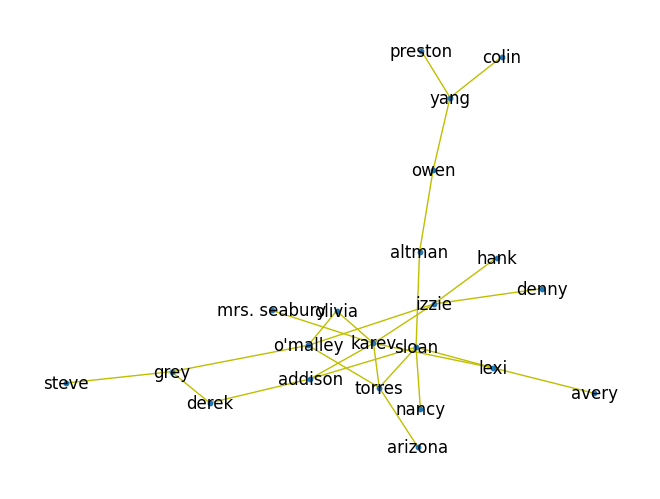

In [63]:
nx.draw(graph_s,with_labels=True,edge_color="y",node_size=10)

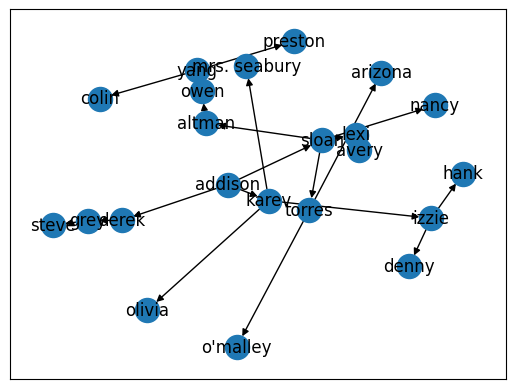

In [64]:
group1 = nx.bfs_tree(graph_s,"addison")
nx.draw_networkx(group1)

分析colin和owen

In [67]:
nx.shortest_path(graph_s,"colin","owen")

['colin', 'yang', 'owen']

In [73]:
cn=nx.common_neighbors(graph_s,"colin","owen")
list(nx.common_neighbors(graph_s,"colin","owen"))
lcn=len(list(nx.common_neighbors(graph_s,"colin","owen")))
lcn

1

In [77]:
jacc=nx.jaccard_coefficient(graph_s,[("colin","owen")])
list(jacc)

[('colin', 'owen', 0.5)]

In [81]:
pa=nx.preferential_attachment(graph_s,[("colin","owen")])
list(pa)

[('colin', 'owen', 2)]

分析olivia和denny

In [69]:
nx.shortest_path(graph_s,"olivia","denny")

['olivia', 'karev', 'izzie', 'denny']

In [74]:
cn=nx.common_neighbors(graph_s,"olivia","denny")
list(nx.common_neighbors(graph_s,"olivia","denny"))
lcn=len(list(nx.common_neighbors(graph_s,"olivia","denny")))
lcn

0

In [78]:
jacc=nx.jaccard_coefficient(graph_s,[("olivia","denny")])
list(jacc)

[('olivia', 'denny', 0.0)]

In [84]:
pa=nx.preferential_attachment(graph_s,[("olivia","denny")])
list(pa)

[('olivia', 'denny', 2)]

分析o'malley和yang

In [70]:
nx.shortest_path(graph_s,"o'malley","yang")

["o'malley", 'torres', 'sloan', 'altman', 'owen', 'yang']

In [75]:
cn=nx.common_neighbors(graph_s,"o'malley","yang")
list(nx.common_neighbors(graph_s,"o'malley","yang"))
lcn=len(list(nx.common_neighbors(graph_s,"o'malley","yang")))
lcn

0

In [79]:
jacc=nx.jaccard_coefficient(graph_s,[("o'malley","yang")])
list(jacc)

[("o'malley", 'yang', 0.0)]

In [83]:
pa=nx.preferential_attachment(graph_s,[("o'malley","yang")])
list(pa)

[("o'malley", 'yang', 12)]